In [60]:
import pandas as pd
import seaborn as sns

In [61]:
# load data
headlines_file = 'data/Sarcasm_Headlines_Dataset_v2.json'
df = pd.read_json(headlines_file, lines = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [62]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [63]:
# check for duplicate rows
df.loc[df.duplicated() == True]

,is_sarcastic,headline,article_link
18572,0,hillary clinton vs. herself,https://www.huffingtonpost.comhttp://nymag.com...
25743,1,nation not sure how many ex-trump staffers it ...,https://politics.theonion.com/nation-not-sure-...


In [64]:
# remove duplicates
df.drop_duplicates(inplace=True, ignore_index = True)

# drop article link column, don't need it
df.drop(columns=['article_link'], inplace=True)

In [65]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


### Check if dataset is balanced

              headline
is_sarcastic          
0                14984
1                13633


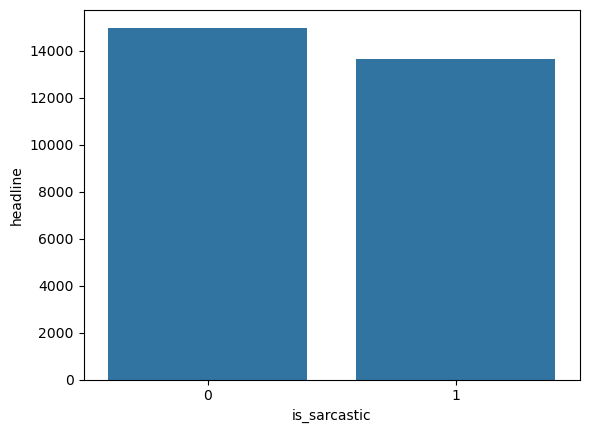

In [66]:
# group by label
group_obj = df.groupby('is_sarcastic')
print(group_obj.count())

# bar plot to visualize
sns.barplot(group_obj.agg('count')['headline']);

In [67]:
# check the spread of headlines length
df['headline'].str.len().describe()

count    28617.000000
mean        62.309711
std         20.726151
min          7.000000
25%         49.000000
50%         62.000000
75%         75.000000
max        926.000000
Name: headline, dtype: float64

<Axes: ylabel='headline'>

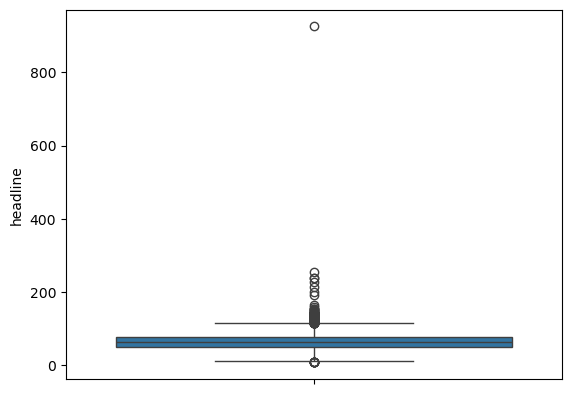

In [68]:
sns.boxplot(df['headline'].str.len())

### Above box plot shows some outliers, let's clean that

In [69]:
# add length column
df['length'] = df['headline'].str.len()

# calculate Q1, Q3 and IQR
Q1 = df['length'].quantile(0.25)
Q3 = df['length'].quantile(0.75)
IQR = Q3 - Q1

# find lower and upper bounds beyond which outliers exist
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outliers
df_cleaned = df[(df['length'] >= lower_bound) & (df['length'] <= upper_bound)]

# drop length column, it's job is done
df_cleaned = df_cleaned.drop(columns='length')

print("Origina shape of DataFrame:", df.shape)
print("DataFrame shape after cleaning :", df_cleaned.shape)

Origina shape of DataFrame: (28617, 3)
DataFrame shape after cleaning : (28313, 2)


In [70]:
df_cleaned.headline.str.len().describe()

count    28313.000000
mean        61.629146
std         18.980705
min         10.000000
25%         49.000000
50%         62.000000
75%         74.000000
max        114.000000
Name: headline, dtype: float64